In [1]:
%config Completer.use_jedi = False
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from multiprocessing import Pool

import sys
sys.path.append("/end/home/rh2310/morpho_repo/amplitude_method")
from utils import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
init_printing(use_latex='mathjax')#(use_latex=True)

#### Define a list of parameters

In [4]:
U, V, A, B, C, D, E, F, aTc = symbols('U, V, A, B, C, D, E, F, aTc', real=True, positive = True)

(b_A, b_B, b_C, b_D, b_E, b_F, 
K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1,
μ_U, μ_V, μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc) = symbols(
    'b_A, b_B, b_C, b_D, b_E, b_F, K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1, mu_U, mu_V, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc', 
    real=True, positive = True)

k, n_aTc, n = symbols('k, n_{aTc}, n', integer=True)

In [99]:
c_1_val = 0
K_A_val = 0

> The PDEs are as follows

<h3><center>$
   \frac{\partial U}{\partial t} =  A -c_1 E- \mu_U U + \Delta U, 
$</center></h3><h3><center>$
   \frac{\partial V}{\partial t} =  B - \mu_V V + \Delta V, 
$</center></h3><h3><center>$
     \frac{\partial A}{\partial t} = (b_A)^2  +   b_A  \times \frac{1}{1+\left(\frac{D}{ K_{DA}}\right)^{n_{DA}}} -  A,
$</center></h3><h3><center>$     \frac{\partial B}{\partial t} = \mu_B \left[ (b_B)^2  +   b_B  \times  \frac{1}{1+\left(\frac{K_{AB}}{U}\right)^{n_{AB}}} \times \frac{1}{1+\left(\frac{E}{ K_{EB}}\right)^{n_{EB}}} -  B \right],
$</center></h3><h3><center>$
\frac{\partial C}{\partial t} = \mu_C \left[ (b_C)^2  +   b_C  \times \frac{1}{1+\left(\frac{D}{ K_{DA}}\right)^{n_{DA}}} -  C \right],
$</center></h3><h3><center>$
    \frac{\partial D}{\partial t} = \mu_D \left[ (b_D)^2  +   b_D  \times \frac{1}{1+\left(\frac{K_{BD}}{V}\right)^{n_{BD}}} -  D \right],
$</center></h3><h3><center>$   \frac{\partial E}{\partial t} = \mu_E \left[ (b_E)^2  +   b_E  \times \frac{1}{1+\left(\frac{C}{K_{CE}([aTc])}\right)^{n_{CE}}} \times \frac{1}{1+\left(\frac{F}{ K_{FE}}\right)^{n_{FE}}} \times \frac{1}{1+\left(\frac{K_{EE}}{ E}\right)^{n_{EE}}} - E \right],
$</center></h3><h3><center>$
    \frac{\partial F}{\partial t} = \mu_F \left[ (b_F)^2  +   b_F  \times \frac{1}{1+\left(\frac{K_{BD}}{V}\right)^{n_{BD}}} - F \right].
$</center></h3><h3><center>$
    \frac{\partial [aTc]}{\partial t} = -\mu_{aTc} [aTc].
$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>
Then, we define kinetic terms as

<h3><center>$f_U(U, \dots, F) = A -c_1E - \mu_U U$</center></h3>
<h3><center>$f_V(U, \dots, F) = B - \mu_V V$</center></h3>
<h3><center>$f_A(U, \dots, F) = (b_A)^2  +   b_A  \times \frac{1}{1+\left(\frac{D}{ K_{DA}}\right)^{n_{DA}}} -  A$</center></h3>
<h3><center>$f_B(U, \dots, F) = \mu_B \left[ (b_B)^2  +   b_B  \times  \frac{1}{1+\left(\frac{K_{AB}}{U}\right)^{n_{AB}}} \times \frac{1}{1+\left(\frac{E}{ K_{EB}}\right)^{n_{EB}}} -  B \right]$</center></h3>
<h3><center>$f_C(U, \dots, F) = \mu_C \left[ (b_C)^2  +   b_C  \times \frac{1}{1+\left(\frac{D}{ K_{DA}}\right)^{n_{DA}}} -  C \right]$</center></h3>
<h3><center>$f_D(U, \dots, F) = \mu_D \left[ (b_D)^2  +   b_D  \times \frac{1}{1+\left(\frac{K_{BD}}{V}\right)^{n_{BD}}} -  D \right]$</center></h3>
<h3><center>$f_E(U, \dots, F) = \mu_E \left[ (b_E)^2  +   b_E  \times \frac{1}{1+\left(\frac{C}{K'_{CE}([aTc])}\right)^{n_{CE}}} \times \frac{1}{1+\left(\frac{F}{ K_{FE}}\right)^{n_{FE}}} \times \frac{1}{1+\left(\frac{K_{EE}}{ E}\right)^{n_{EE}}} - E \right]$</center></h3>
<h3><center>$f_F(U, \dots, F) = \mu_F \left[ (b_F)^2  +   b_F  \times \frac{1}{1+\left(\frac{K_{BD}}{V}\right)^{n_{BD}}} - F \right]$</center></h3>

<h3><center>$aTc^* = 0$</center></h3>


<h3><center>$K'_{CE}([aTc]) = K_{CE}(1+ \frac{aTc}{K_{aTc}})^{n_{aTc}}$</center></h3>

In [100]:
def Hill(x, capacity, n):
    return 1/(1 + (x/capacity)**n)
def Hill_inv(x, capacity, n):
    return 1/(1 + (capacity/x)**n)

fU = A - c_1* E - μ_U * U 
fV = B - μ_V * V
fA = b_A**2 + b_A*Hill(D, K_DA, n) - A
fB = μ_B * (b_B**2 + b_B*Hill_inv(U, K_AB, n) * Hill(E, K_EB, n) - B)
fC = μ_C * (b_C**2 + b_C*Hill(D, K_DA, n) - C)
fD = μ_D * (b_D**2 + b_D*Hill_inv(V, K_BD, n) -  D)
fE = μ_E * (b_E**2 + b_E*Hill(C, K_CE*(1+ aTc/K_aTc)**n_aTc, n) * Hill(F, K_FE, n) * Hill_inv(E, K_EE, n) - E)
fF = μ_F *(b_F**2 + b_F*Hill_inv(V, K_BD, n) - F)
faTc = -μ_aTc * aTc
lprint(r"$f_U(U, V, A, B, C, D, E, F, Atc) =$ {0}", fU)
lprint(r"$f_V(U, V, A, B, C, D, E, F, Atc) =$ {0}", fV)
lprint(r"$f_A(U, V, A, B, C, D, E, F, Atc) =$ {0}", fA)
lprint(r"$f_B(U, V, A, B, C, D, E, F, Atc) =$ {0}", fB)
lprint(r"$f_C(U, V, A, B, C, D, E, F, Atc) =$ {0}", fC)
lprint(r"$f_D(U, V, A, B, C, D, E, F, Atc) =$ {0}", fD)
lprint(r"$f_E(U, V, A, B, C, D, E, F, Atc) =$ {0}", fE)
lprint(r"$f_F(U, V, A, B, C, D, E, F, Atc) =$ {0}", fF)
lprint(r"$f_{aTc}(U, V, A, B, C, D, E, F, Atc) =$ {0}", faTc)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### which as a vector, we can define it like

In [101]:
Kinetic = Matrix([[fU], [fV], [fA], [fB], [fC], [fD], [fE], [fF], [faTc]])
lprint(r"$\boldsymbol{f}(U, V, A, B, C, D, E, F, Atc) =$ {0} ", Kinetic)

<IPython.core.display.Latex object>

#### First, we find the fix points of the system without diffusion. 


The solution of the above system finds $U^*, \dots, aTc^*$ such that
<center>$f_U(U^*, V^*, A^*, B^*, C^*, D^*, E^*, F^*, aTc^*) = 0$</center>
<center>$f_V(U^*, V^*, A^*, B^*, C^*, D^*, E^*, F^*, aTc^*) = 0$</center>
<center>$f_A(U^*, V^*, A^*, B^*, C^*, D^*, E^*, F^*, aTc^*) = 0$</center>
<center>$f_B(U^*, V^*, A^*, B^*, C^*, D^*, E^*, F^*, aTc^*) = 0$</center>
<center>$f_C(U^*, V^*, A^*, B^*, C^*, D^*, E^*, F^*, aTc^*) = 0$</center>
<center>$f_D(U^*, V^*, A^*, B^*, C^*, D^*, E^*, F^*, aTc^*) = 0$</center>
<center>$f_E(U^*, V^*, A^*, B^*, C^*, D^*, E^*, F^*, aTc^*) = 0$</center>
<center>$f_{aTc}(U^*, V^*, A^*, B^*, C^*, D^*, E^*, F^*, aTc^*) = 0$</center>
which are

In [102]:
# Combining A and C's Eqs.
fA2 = A -b_A**2 - C + b_C**2
# 
#fB2 = ((B-b_B**2)/b_B)*(1 + (μ_V*K_AB/A)**n)-(1/(1 + (E/K_EB)**n))
fB2 = b_B**2 + b_B*Hill_inv(U, K_AB, n) * Hill(E, K_EB, n) - B
# C's Eq.
fC2 = D - K_DA * (b_C/(C-b_C**2) - 1)**(1/n)
# E's Eq. where aTC= 0 
#fE2 = ((E-b_E**2)/b_E)*(1 + K_EE/E)**n - (1/(1+(C/K_CE)**n))*(1/(1+(F/K_FE)**n))
fE2 = b_E**2 + b_E*Hill(C, K_CE*(1+ aTc/K_aTc)**n_aTc, n) * Hill(F, K_FE, n) * Hill_inv(E, K_EE, n) - E
fE2 = fE2.subs([(aTc, 0)])
# Combining D and F's Eqs.
fF2 = F -b_F**2 - D + b_D**2
#


lprint(r"$f2_A(A, C, D, E, F) =$ {0}", fA2)
lprint(r"$f2_B(A, C, D, E, F) =$ {0}", fB2)
lprint(r"$f2_C(A, C, D, E, F) =$ {0}", fC2)
lprint(r"$f2_E(A, C, D, E, F) =$ {0}", fE2)
lprint(r"$f2_F(A, C, D, E, F) =$ {0}", fF2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [103]:
D_star = solve(fD, D)[0]
lprint(r"$D^* = $ {0}", D_star)
B_star =  μ_V * V
lprint(r"$B^* = $ {0}", B_star)

C_star = solve(fC2, C)[0].subs(D, D_star).simplify()
lprint(r"$C^* = $ {0}", C_star)
A_star = solve(fA2, A)[0].subs(C, C_star).simplify()
lprint(r"$A^* = $ {0}", A_star)
F_star = solve(fF2, F)[0].subs(D, D_star).simplify()
lprint(r"$F^* = $ {0}", F_star)
U_star = (A_star/ μ_U) - (c_1 * E/ μ_U)
lprint(r"$U^* = $ {0}", U_star)
#V_star = (K_BD/((b_D/(D - b_D**2)) - 1)**(1/n))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [104]:
VE_Eq_1 = fB2.subs([(U, U_star), (B, B_star)])
lprint(r" {0}", VE_Eq_1)

<IPython.core.display.Latex object>

In [105]:
VE_Eq_2 = fE2.subs([(F, F_star), (C, C_star)])
lprint(r" {0}", VE_Eq_2)

<IPython.core.display.Latex object>

# Test finding the steady state solutions

In [106]:
f1 = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
               μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
               K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1,
               V, E], 
              VE_Eq_1,
              modules='numpy')

f2 = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
               μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
               K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc,  K_A, c_1,
               V, E], 
              VE_Eq_2,
              modules='numpy')

In [109]:
def create_eqs_func(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                    mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1):
    def f_1(args):
        V, E = args
        return (f1(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                    mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1, V, E),
               f2(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                    mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1, V, E)) 
    
    return f_1

func = create_eqs_func(n=3, b_A=.1, b_B=.1, b_C=.1, b_D=.1, b_E=.1, b_F=.1, 
          mu_V=1000, mu_U=1000, mu_B=0.5, mu_C=0.5, mu_D=0.5, mu_E=0.5, mu_F=0.5, mu_aTc=0.5, n_aTc=3,
          K_AB=1, K_BD=1, K_CE=1, K_DA=1, K_EB=1, K_EE=1, K_FE=1, K_aTc=1, K_A=K_A_val, c_1=c_1_val)

In [110]:
from scipy.optimize import fsolve

root = fsolve(func, [1, 1], xtol=1e-10, maxfev=10000)
print(root)

[1.00000000e-05 1.00000999e-02]


In [111]:
func(root)

(-6.242442482885498e-19, 1.4138832774246391e-19)

In [112]:
D_f1 = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
                 μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
                 K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1,  
                 V, E], 
                     D_star, modules='numpy')
B_f1 = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
                 μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
                 K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1,  
                 V, E], 
                 B_star, modules='numpy')
C_f1 = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
                 μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
                 K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1,  
                 V, E], 
                 C_star, modules='numpy')
A_f1 = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
                 μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
                 K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1,  
                 V, E], 
                 A_star, modules='numpy')
F_f1 = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
                 μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
                 K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1,  
                 V, E], 
                 F_star, modules='numpy')
U_f1 = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
                 μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
                 K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1, 
                 V, E], 
                 U_star, modules='numpy')

def create_eqs_others(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                     mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1):
    def f_1(args):
        V, E = args
        return (D_f1(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                     mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1, V, E),
               B_f1(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                     mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1, V, E),
               C_f1(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                     mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1, V, E),
               A_f1(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                     mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1, V, E),
               F_f1(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                     mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1, V, E),
               U_f1(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                     mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, K_A, c_1, V, E)) 
    
    return f_1

In [113]:
f_others = create_eqs_others(n=3, b_A=.1, b_B=.1, b_C=.1, b_D=.1, b_E=.1, b_F=.1, 
          mu_V=1000, mu_U=1000, mu_B=0.5, mu_C=0.5, mu_D=0.5, mu_E=0.5, mu_F=0.5, mu_aTc=0.5, n_aTc=3,
          K_AB=1, K_BD=1, K_CE=1, K_DA=1, K_EB=1, K_EE=1, K_FE=1, K_aTc=1, K_A=K_A_val, c_1=c_1_val)

In [114]:
(V_s, E_s) = root
(D_s, B_s, C_s, A_s, F_s, U_s) = f_others(root)

In [115]:
kinetic_f = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
                      μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
                      K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, aTc, K_A, c_1, 
                      V, E, D, B, C, A, F, U], 
                      Kinetic, modules='numpy')

In [116]:
print(V_s, E_s, D_s, B_s, C_s, A_s, F_s, U_s)
kinetic_f(n=3, b_A=.1, b_B=.1, b_C=.1, b_D=.1, b_E=.1, b_F=.1, 
          mu_V=1000, mu_U=1000, mu_B=0.5, mu_C=0.5, mu_D=0.5, mu_E=0.5, mu_F=0.5, mu_aTc=0.5, n_aTc=3,
          K_AB=1, K_BD=1, K_CE=1, K_DA=1, K_EB=1, K_EE=1, K_FE=1, K_aTc=1,
          aTc = 0,  K_A=K_A_val, c_1=c_1_val,
          V= V_s, E = E_s, D = D_s, B = B_s, C = C_s, A = A_s, F = F_s, U = U_s)

1.0000000000133102e-05 0.010000099869869685 0.0100000000000001 0.010000000000133102 0.10999990000010004 0.10999990000010001 0.010000000000000103 0.00010999990000010001


array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 1.38777878e-17],
       [-3.12122124e-19],
       [-6.93889390e-18],
       [ 5.60380937e-19],
       [ 7.06941639e-20],
       [-3.06980801e-19],
       [ 0.00000000e+00]])

#### Next, to linearise the PDE system, we find the Jacobian of $(f_u, \dots, f_{aTc})$ that evaluated at $(u^*, \dots, {aTc}^*)$ 

In [76]:
J_jac = Kinetic.jacobian([U, V, A, B, C, D, E, F, aTc])
hprint(r"J= \frac{\partial \boldsymbol{f}_i}{\partial u_j} = ", J_jac)

<IPython.core.display.Latex object>

In [77]:
J_jac_zero_aTc = Kinetic.jacobian([U, V, A, B, C, D, E, F, aTc]).subs([(aTc, 0)])
hprint(r"J= \frac{\partial \boldsymbol{f}_i}{\partial u_j} = ", J_jac_zero_aTc)

<IPython.core.display.Latex object>

In [78]:
J = J_jac.subs([(U, U_star), (A, A_star), (B, B_star),
                (C, C_star), (D, D_star), (F, F_star),
                (aTc, 0)])
hprint("J|_{(u^*, v^*)} =", J)

<IPython.core.display.Latex object>

In [79]:
J_f = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F,
                     μ_V, μ_U, μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc,  K_A, c_1, 
                     V, E], 
              J,
              modules='numpy')


In [117]:
M = J_f(n=3, b_A=.1, b_B=.1, b_C=.1, b_D=.1, b_E=.1, b_F=.1, 
          mu_V=1000, mu_U=1000, mu_B=0.5, mu_C=0.5, mu_D=0.5, mu_E=0.5, mu_F=0.5, mu_aTc=0.5, n_aTc=3,
          K_AB=1, K_BD=1, K_CE=1, K_DA=1, K_EB=1, K_EE=1, K_FE=1, K_aTc=1,  K_A=K_A_val, c_1=c_1_val, 
          V=V_s, E=E_s)

In [118]:
from numpy import linalg
np.max(np.real(linalg.eigvals(M)))

-0.49998501968413667

In [119]:
k = symbols('k')

In [120]:
J_2 = J - Matrix([[k**2,   0, 0, 0, 0, 0, 0, 0, 0], 
                  [0, D*k**2, 0, 0, 0, 0, 0, 0, 0],
                  [0,      0, 0, 0, 0, 0, 0, 0, 0],
                  [0,      0, 0, 0, 0, 0, 0, 0, 0],
                  [0,      0, 0, 0, 0, 0, 0, 0, 0],
                  [0,      0, 0, 0, 0, 0, 0, 0, 0],
                  [0,      0, 0, 0, 0, 0, 0, 0, 0],
                  [0,      0, 0, 0, 0, 0, 0, 0, 0],
                  [0,      0, 0, 0, 0, 0, 0, 0, 0]
                 ])

In [121]:
J_2_s = J_2.subs([(n,3), (b_A,.1), (b_B,.1), (b_C,.1), (b_D,.1), (b_E,.1), (b_F,.1), 
          (μ_V,1000), (μ_U,1000), (μ_B,0.5), (μ_C,0.5), (μ_D,0.5), (μ_E,0.5), (μ_F,0.5), 
          (μ_aTc,0.5), (n_aTc,3),
          (K_AB,1), (K_BD,1), (K_CE,1), (K_DA,1), (K_EB,1), (K_EE,1), (K_FE,1), (K_aTc,1),  
                  (K_A,K_A_val), (c_1,c_1_val), 
          (V,V_s), (E,E_s), (D, 2)])

In [122]:
J_2_s

⎡      2                                                                      
⎢   - k  - 1000               0            1    0             0               
⎢                                                                             
⎢                            2                                                
⎢        0              - 2⋅k  - 1000      0    1             0               
⎢                                                                             
⎢        0                    0            -1   0             0           -2.9
⎢                                                                             
⎢1.8149948849507e-9           0            0   -0.5           0               
⎢                                                                             
⎢        0                    0            0    0           -0.5          -1.4
⎢                                                                             
⎢        0           1.50000000003993e-11  0    0   

In [89]:
J_2_s_f = lambdify([k], J_2_s, modules='numpy')

In [123]:
J_2_as_D = J_2.subs([(n,3), (b_A,.1), (b_B,.1), (b_C,.1), (b_D,.1), (b_E,.1), (b_F,.1), 
          (μ_V,1000), (μ_U,1000), (μ_B,0.5), (μ_C,0.5), (μ_D,0.5), (μ_E,0.5), (μ_F,0.5), 
          (μ_aTc,0.5), (n_aTc,3),
          (K_AB,1), (K_BD,1), (K_CE,1), (K_DA,1), (K_EB,1), (K_EE,1), (K_FE,1), (K_aTc,1), 
                     (K_A,K_A_val), (c_1,c_1_val), 
          (V,V_s), (E,E_s)])

J_2_as_D_f = lambdify([D,k], J_2_as_D, modules='numpy')

In [124]:
print(np.max(np.real(linalg.eigvals(J_2_as_D_f(0, 10)))))
print(np.max(np.real(linalg.eigvals(J_2_as_D_f(10, 10)))))
#print(linalg.eigvals(J_2_as_D_f(2)))

-0.49998501968413706
-0.499985019684137


In [125]:
ks = np.linspace(0, 100, 500)
for ddd in [0.1, 1, 10]:
    print(ddd, np.max([np.max(np.real(linalg.eigvals(J_2_as_D_f(ddd, k)))) for k in ks]))
    

0.1 -0.49998501968413694
1 -0.49998501968413694
10 -0.49998501968413694


In [126]:
ks = np.linspace(0, 100, 500)
np.max([np.max(np.real(linalg.eigvals(J_2_s_f(k)))) for k in ks])

-0.49176705146320354

In [32]:
Ds = np.r_[(0,), np.logspace(-4, 4, 9)]
def get_max(d_val, 
            μ_U_val=1000, 
            μ_V_val=1000,
            μ_B_val=1,
            μ_C_val=1,
            μ_D_val=1,
            μ_E_val=1,
            μ_F_val=1):
    J_2_s = J_2.subs([(n,3), (b_A,.1), (b_B,.1), (b_C,.1), (b_D,.1), (b_E,.1), (b_F,.1), 
          (μ_V,μ_V_val), (μ_U, μ_U_val), (μ_B,μ_B_val), (μ_C,μ_C_val), 
                      (μ_D,μ_D_val), (μ_E,μ_E_val), (μ_F,μ_F_val), 
          (μ_aTc,0.5), (n_aTc,3),
          (K_AB,1), (K_BD,1), (K_CE,1), (K_DA,1), (K_EB,1), (K_EE,1), (K_FE,1), (K_aTc,1),
          (V,V_s), (E,E_s), (D, d_val)])
    J_2_s_f = lambdify([k], J_2_s, modules='numpy')
    return np.max([np.max(np.real(linalg.eigvals(J_2_s_f(k)))) for k in ks])


def is_constant(args):
    μ_U_val, μ_V_val, μ_B_val,μ_C_val,μ_D_val,μ_E_val = args
    a = np.array([get_max(d_val, μ_U_val, μ_V_val, μ_B_val,μ_C_val) for d_val in Ds])
    return np.all(np.isclose(a[1:] - a[:-1], 0, atol=1e-10))
    

In [33]:
vals = np.logspace(-3, 2, 6)
(vals_1, vals_2, vals_3, vals_4, vals_5, vals_6) = np.meshgrid(vals, vals, vals, vals, vals, vals)

In [ ]:
with Pool(16) as pool:
    res = pool.map(is_constant, zip(vals_1.flatten(), 
                                     vals_2.flatten(),
                                     vals_3.flatten(),
                                     vals_4.flatten(),
                                     vals_5.flatten(),
                                     vals_6.flatten()))

In [51]:
np.all(res)

False

In [55]:
np.where(np.array(res) == False)

(array([ 1296,  1297,  1298, ..., 11661, 11662, 11663]),)

In [63]:
print(vals_1.flatten()[11662])
print(vals_2.flatten()[11662])
print(vals_3.flatten()[11662])
print(vals_4.flatten()[11662])
print(vals_5.flatten()[11662])
print(vals_6.flatten()[11662])

0.1
0.01
100.0
100.0
100.0
10.0


In [65]:
index = 11662
μ_U_val, μ_V_val, μ_B_val,μ_C_val,μ_D_val,μ_E_val=(vals_1.flatten()[index],
                                                   vals_2.flatten()[index],
                                                   vals_3.flatten()[index],
                                                   vals_4.flatten()[index],
                                                   vals_5.flatten()[index],
                                                   vals_6.flatten()[index])
a = np.array([get_max(d_val, μ_U_val, μ_V_val, μ_B_val,μ_C_val,μ_D_val,μ_E_val) for d_val in Ds])
print(index, np.max(np.abs(a[1:] - a[:-1])))

11662 3.299284441135586e-09


In [66]:
for index in np.where(np.array(res) == False)[0]:
    μ_U_val, μ_V_val, μ_B_val,μ_C_val,μ_D_val,μ_E_val=(vals_1.flatten()[index],
                                                   vals_2.flatten()[index],
                                                   vals_3.flatten()[index],
                                                   vals_4.flatten()[index],
                                                   vals_5.flatten()[index],
                                                   vals_6.flatten()[index])
    a = np.array([get_max(d_val, μ_U_val, μ_V_val, μ_B_val,μ_C_val,μ_D_val,μ_E_val) for d_val in Ds])
    print(index, np.max(np.abs(a[1:] - a[:-1])))

1296 0.0
1297 0.0
1298 0.0
1299 0.0
1300 0.0
1301 0.0
1302 1.367494680210371e-09
1303 4.160104023417932e-10
1304 4.0741935389623785e-10
1305 4.0160804282846074e-10
1306 4.636389323679768e-10
1307 4.040917656912557e-10
1308 1.5421181512754317e-09
1309 4.0419731147170457e-10
1310 3.908868630251444e-10
1311 3.8974835359952e-10
1312 5.017193088936722e-10
1313 4.021494285581101e-10
1314 1.540895749104626e-09
1315 4.085384329010483e-10
1316 3.918175460731338e-10
1317 3.8858262874780225e-10
1318 4.50413397768204e-10
1319 1.2762999077736703e-09
1320 1.5407727463681575e-09
1321 6.083774989860957e-10
1322 8.746627133508766e-10
1323 7.861412569098308e-10
1324 5.481463724761604e-10
1325 2.4664161685228336e-09
1326 1.5399663224301141e-09
1327 3.365565578831997e-09
1328 1.776704776790955e-09
1329 3.538833346587028e-09
1330 1.5100941536724116e-09
1331 3.9404742509328156e-09
2844 2.187919984075748e-16
2845 0.0
2846 0.0
2847 0.0
2848 0.0
2849 0.0
2850 3.9811903773667723e-16
2851 3.6688029829857333e-09


3178 3.33527405693701e-09
3179 3.335274062574861e-09
3180 2.92300905702092e-16
3181 3.0320664076276954e-09
3182 3.0320659919445825e-09
3183 3.032066272102424e-09
3184 3.0320662714519026e-09
3185 3.0320783746175944e-09
3186 3.3371742869103826e-16
3187 3.004750243323223e-09
3188 3.0047510944219286e-09
3189 3.004750275632448e-09
3190 3.0047502758492883e-09
3191 3.0047509352610496e-09
3192 4.360661137736699e-16
3193 3.002046805372291e-09
3194 3.0020458170135905e-09
3195 3.0020459182780734e-09
3196 3.0020456682610525e-09
3197 3.0020461340343058e-09
3198 2.4338170367954604e-15
3199 3.0017852862673083e-09
3200 3.0017856312604396e-09
3201 3.0017794103252143e-09
3202 3.001789661456755e-09
3203 3.001778869742011e-09
3204 1.1102230246251565e-16
3205 0.0
3206 0.0
3207 0.0
3208 0.0
3209 0.0
3210 3.608224830031759e-16
3211 3.3352740523833607e-09
3212 3.335291433878909e-09
3213 3.3352766882956825e-09
3214 3.3352743806797785e-09
3215 3.3352740328677216e-09
3216 3.673276960380889e-16
3217 3.03206637033

KeyboardInterrupt: 

In [61]:
a[1:] - a[:-1]

array([-3.29928444e-09,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [31]:
param_lookup = dict([('n', n), ('n_aTc', n_aTc), ('b_A', b_A), ('b_B', b_B), ('b_C', b_C), ('b_D', b_D), 
                     ('b_E', b_E), ('b_F', b_F), 
                     ('mu_V', μ_V), ('mu_U',μ_U), ('mu_B', μ_B), ('mu_C', μ_C), ('mu_D', μ_D), 
                     ('mu_E', μ_E), ('mu_F', μ_F), ('mu_aTc', μ_aTc),
                     ('K_AB', K_AB), ('K_BD', K_BD), ('K_CE', K_CE), ('K_DA', K_DA), ('K_EB', K_EB), 
                     ('K_EE', K_EE), ('K_FE', K_FE), ('K_aTc', K_aTc)])

In [32]:
params = [('n', 3),('n_aTc',3), ('b_A',.01), ('b_B',.01), ('b_C',.01), ('b_D',.01), ('b_E',.5), ('b_F',.01), 
          ('mu_V', 0.5), ('mu_U',0.5), ('mu_B',0.5), ('mu_C',0.5), ('mu_D',0.5), ('mu_E',0.5), ('mu_F',0.5), 
          ('mu_aTc',0.5), 
          ('K_AB', 10), ('K_BD', 10), ('K_CE', 10), ('K_DA', 10), ('K_EB', 10), ('K_EE',1),
          ('K_FE',10), ('K_aTc',10)]

In [33]:
params = [('n', 3),('n_aTc',3), ('b_A',.01), ('b_B',.01), ('b_C',.01), ('b_D',.01), ('b_E',.5), ('b_F',.01), 
          ('mu_V', 0.005), ('mu_U',0.005), ('mu_B',0.5), ('mu_C',0.5), ('mu_D',0.5), ('mu_E',0.5), ('mu_F',0.5), 
          ('mu_aTc',0.5), 
          ('K_AB', 10), ('K_BD', 10), ('K_CE', 10), ('K_DA', 10), ('K_EB', 10), ('K_EE',1),
          ('K_FE',10), ('K_aTc',10)]

In [34]:
from numpy import linalg

In [35]:
ks = np.linspace(0, 100, 100+1)

In [57]:
def search(params, D_val = 2):
    func = create_eqs_func(**dict(params))
    root = fsolve(func, [1, 1], xtol=1e-10, maxfev=10000)
    #f_others = create_eqs_others(**dict(params))

    (V_s, E_s) = root
    #(D_s, B_s, C_s, A_s, F_s, U_s) = f_others(root)

    M = J_f(V=V_s, E=E_s, **dict(params))


    if np.max(np.real(linalg.eigvals(M))) < 0:
        J_2_s = J_2.subs([(param_lookup[key],v) for key,v in dict(params).items()]  + [(V,V_s), (E,E_s), (D, D_val)])
        J_2_s_f = lambdify([k], J_2_s, modules='numpy')

        return np.max([np.max(np.real(linalg.eigvals(J_2_s_f(kv)))) for kv in ks])
    else:
        return np.nan

In [37]:
from multiprocessing import Pool

In [38]:
search(params)

-0.005

In [39]:
#@numba.jit
def new_params(params, size=100):
    i_s = np.random.randint(2, 24, size)
    ds = []
    #ds = [params.copy() for _ in i_s]
    p = params.copy()
    for index, i in enumerate(i_s):        
    #    ds[index][i] = (ds[index][i][0], np.random.lognormal(0, 10))
        key,v = p[i]        
        #p[i] = (key, params[i][1]*np.random.lognormal(0, 1))
        p[i] = (key, np.random.normal(v, 10))
        while p[i][1] <= 0:
            p[i] = (key, np.random.normal(v, 10))
        #p[i] = (key, v + np.random.lognormal(0, .1))
        ds += [p.copy()]
    return ds
        

In [40]:
params = [('n', 3),('n_aTc',3), ('b_A',.01), ('b_B',.01), ('b_C',.01), ('b_D',.01), ('b_E',.5), ('b_F',.01), 
          ('mu_V', 0.005), ('mu_U',0.005), ('mu_B',0.5), ('mu_C',0.5), ('mu_D',0.5), ('mu_E',0.5), ('mu_F',0.5), 
          ('mu_aTc',0.5), 
          ('K_AB', 10), ('K_BD', 10), ('K_CE', 10), ('K_DA', 10), ('K_EB', 10), ('K_EE',1),
          ('K_FE',10), ('K_aTc',10)]

In [41]:
def search_para(params):    
    return search(params)

In [42]:
pos_res = []
nan_res = []
for loop in range(240):
    print(loop)
    ds = new_params(params,16*100) 
    with Pool(16) as pool:
        res = pool.map(search_para, ds)
        
    if np.any(np.asarray(res).astype(np.float64)  >= 0):
        pos_res += [(res, ds)]
    if np.any(np.isnan(np.asarray(res).astype(np.float64) )):
        nan_res += [(res, ds)]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239


In [320]:
np.any(np.asarray(res).astype(np.float64)  >= 0)

False

In [321]:
np.any(np.isnan(np.asarray(res).astype(np.float64) ))

False

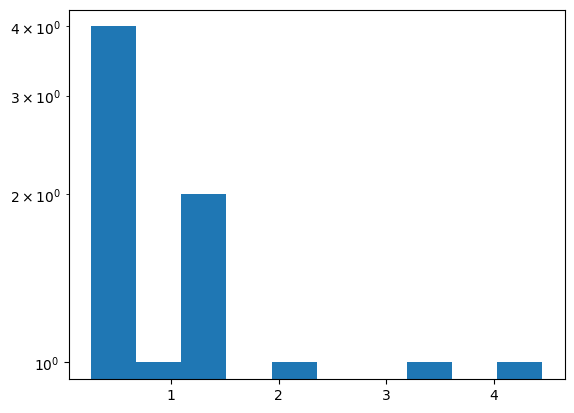

In [335]:
plt.hist(np.random.lognormal(0, 1, 10))
plt.yscale('log')

In [341]:
lllll=new_params(params,1000) 

In [44]:
len(nan_res)

12

In [46]:
for i, (result, p) in enumerate(nan_res):
    for j, item in enumerate(result):
        if np.isnan(item):
            print(i, j, item)

0 5 nan
0 6 nan
0 7 nan
0 8 nan
0 9 nan
0 10 nan
1 43 nan
1 44 nan
1 45 nan
2 87 nan
2 88 nan
2 89 nan
2 90 nan
2 91 nan
2 92 nan
2 93 nan
3 17 nan
3 18 nan
4 9 nan
4 10 nan
4 11 nan
5 13 nan
5 14 nan
5 15 nan
5 16 nan
6 20 nan
6 21 nan
7 154 nan
8 11 nan
8 12 nan
8 13 nan
8 14 nan
8 15 nan
8 16 nan
8 17 nan
8 18 nan
8 19 nan
8 20 nan
8 21 nan
8 22 nan
9 3 nan
10 43 nan
10 44 nan
11 25 nan
11 27 nan


In [47]:
result, p = nan_res[0]

In [50]:
search(p[5])

nan

In [61]:
p_nan = p[5].copy()

In [98]:
p_nan[3] = ('b_B', 7.5)#446)

In [99]:
func = create_eqs_func(**dict(p_nan))
root = fsolve(func, [1, 1], xtol=1e-10, maxfev=10000)
(V_s, E_s) = root
M = J_f(V=V_s, E=E_s, **dict(p_nan))
np.real(linalg.eigvals(M))

array([ 1.03112044e+04, -4.96422801e+00, -5.00000000e-03, -5.00000000e-03,
       -1.98836102e+00, -1.00000000e+00, -5.00000000e-01, -5.00000000e-01,
       -5.00000000e-01])

In [100]:
f_others = create_eqs_others(**dict(p_nan))
(D_s, B_s, C_s, A_s, F_s, U_s) = f_others(root)
kinetic_f(aTc = 0,
          V= V_s, E = E_s, D = D_s, B = B_s, C = C_s, A = A_s, F = F_s, U = U_s,
         **dict(p_nan))

array([[-1.73472348e-18],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 4.37467393e-15],
       [ 0.00000000e+00],
       [-3.44925654e-18],
       [-3.97903932e-13],
       [-8.67361738e-19],
       [ 0.00000000e+00]])

In [105]:
params = [('n', 3),('n_aTc',3), ('b_A',.01), ('b_B',.01), ('b_C',.01), ('b_D',.01), ('b_E',.01), ('b_F',.01), 
          ('mu_V', 1), ('mu_U',1), ('mu_B',0.1), ('mu_C',0.1), ('mu_D',0.1), ('mu_E',0.1), ('mu_F',0.1), 
          ('mu_aTc',0.5), 
          ('K_AB', 1), ('K_BD', 1), ('K_CE', 1), ('K_DA', 1), ('K_EB', 1), ('K_EE',1),
          ('K_FE',1), ('K_aTc',1)]

In [42]:
params = [('n', 3),('n_aTc',3), ('b_A',.01), ('b_B',.01), ('b_C',.01), ('b_D',.01), ('b_E',.01), ('b_F',.01), 
          ('mu_V', 1), ('mu_U',1), ('mu_B',0.1), ('mu_C',0.1), ('mu_D',0.1), ('mu_E',0.0001), ('mu_F',0.1), 
          ('mu_aTc',1), 
          ('K_AB', 10), ('K_BD', 1), ('K_CE', 1), ('K_DA', 1), ('K_EB', 1), ('K_EE',.001),
          ('K_FE',1), ('K_aTc',1)]

In [43]:
#@numba.jit
def new_params_mu(params, size=100):
    i_s = np.random.randint(8, 16, size)
    ds = []
    #ds = [params.copy() for _ in i_s]    
    for index, i in enumerate(i_s):        
    #    ds[index][i] = (ds[index][i][0], np.random.lognormal(0, 10))
        p = params.copy()
        key,v = p[i]        
        p[i] = (key, params[i][1]*np.random.lognormal(0, 1))
        #p[i] = (key, np.random.normal(v, 1))
        #while p[i][1] <= 0:
        #    p[i] = (key, np.random.normal(v, 5))
        #p[i] = (key, v + np.random.lognormal(0, .1))
        ds += [p]
    return ds

In [160]:
pos_res2 = []
zero_res2 = []
for loop in range(1):
    print(loop)
    ds = new_params_mu(params,16*100) 
    with Pool(16) as pool:
        res = pool.map(search_para, ds)
        
    if np.any(np.asarray(res).astype(np.float64)  > 0):
        pos_res2 += [(res, ds)]
    if np.any(np.asarray(res).astype(np.float64)  > -1e-10):
        zero_res2 += [(res, ds)]

0


In [161]:
len(zero_res2)

0

In [177]:
index = np.where(np.asarray(res).astype(np.float64) == np.max(np.asarray(res).astype(np.float64)))[0][0]
ds[index]

[('n', 3),
 ('n_aTc', 3),
 ('b_A', 0.01),
 ('b_B', 0.01),
 ('b_C', 0.01),
 ('b_D', 0.01),
 ('b_E', 0.01),
 ('b_F', 0.01),
 ('mu_V', 1),
 ('mu_U', 1),
 ('mu_B', 0.1),
 ('mu_C', 0.1),
 ('mu_D', 0.1),
 ('mu_E', 2.4700444992947237e-06),
 ('mu_F', 0.1),
 ('mu_aTc', 1),
 ('K_AB', 10),
 ('K_BD', 1),
 ('K_CE', 1),
 ('K_DA', 1),
 ('K_EB', 1),
 ('K_EE', 0.001),
 ('K_FE', 1),
 ('K_aTc', 1)]